In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)  

Python version 3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version 0.21.1
Matplotlib version 2.0.2


In [115]:
def scaleData(inp, minimum, maximum):
    minMaxScaler = preprocessing.MinMaxScaler(copy=True, feature_range=(minimum,maximum))
    #inp = inp.reshape(inp.shape[0]*inp.shape[1])
    inp = minMaxScaler.fit_transform(inp)
    
    return inp
    

## Feature Interpretation and normalisation

In [140]:
Location = r'train.csv'
df = pd.read_csv(Location, parse_dates=['booking_date', 'dep_date'])
#pd.to_datetime(pd.Series(sLength, index=df.index))
#print(type(df["Hour"][0]))

#testing Data
Location = r'test.csv'
test_df = pd.read_csv(Location, parse_dates=['booking_date', 'dep_date'])
#print(type(test_df["Hour"][0]))

maxPax  = 7#max(df['pax'])
numDaysInYear = 100
numClasses = 4
epsilon = 0.0001

#df['dep_time'] = pd.to_datetime(pd.Series(sLength, index=df.index))
#test_df['Day'] = pd.Series(sLength, index=df.index)

originList = df.origin.unique()
df = df.assign(journey=(df['origin'] + '_' + df['destination']).astype('category').cat.codes)
df = df.assign(origin=(df['origin']).astype('category').cat.codes)
df = df.assign(destination=(df['destination']).astype('category').cat.codes)
maxOrg  = max(df['origin'])+1
maxDest  = max(df['destination'])+1
df['origin'] = (df['origin']+1)/maxOrg
df['destination'] = (df['destination']+1)/maxDest
df['days'] = (((df['dep_date'] - df['booking_date'])/np.timedelta64(1, 'D')).astype(int)+1)/numDaysInYear
df['days_in'] = df.days[np.abs(df.days-df.days.mean())<=(2*df.days.std())]
df['days_in'] = df.days_in.fillna(epsilon)
df['days_log'] = np.log(df['days'])
df['booking_weekday'] = (df['booking_date'].dt.dayofweek+1)/7
df['dep_weekday'] = (df['dep_date'].dt.dayofweek+1)/7
df['booking_date'] = (df['booking_date'].dt.dayofyear)/numDaysInYear
df['dep_date'] = (df['dep_date'].dt.dayofyear)/numDaysInYear
df['booking_date_in'] = np.abs(df.booking_date-df.booking_date.mean())<=(3*df.booking_date.std())
df['booking_date_log'] = np.log(df['booking_date'])
df['dep_date_log'] = np.log(df['dep_date'])
df['fare_choice_sc'] = (df.groupby(['fare_choice']).ngroup()+1)
df['dep_time_sc'] = (((df['dep_time']%100).astype(int)/5)+1 + ((df['dep_time']/100).astype(int)+1)*12)/((24*12))
df['pax'] = df['pax']/maxPax
#df['id2'] = df.groupby(['destination']).ngroup()
maxID  = max(df['journey'])+1
df['journey'] = (df['journey']+1)/maxID
print((df.ix[56109]))

maxPax  = max(test_df['pax'])
test_df = test_df.assign(journey=(test_df['origin'] + '_' + test_df['destination']).astype('category').cat.codes)
test_df = test_df.assign(origin=(df['origin']).astype('category').cat.codes)
test_df = test_df.assign(destination=(df['destination']).astype('category').cat.codes)
maxOrg  = max(test_df['origin'])+1
maxDest  = max(test_df['destination'])+1
test_df['origin'] = (test_df['origin']+1)/maxOrg
test_df['destination'] = (test_df['destination']+1)/maxDest
test_df['days'] = (((test_df['dep_date'] - test_df['booking_date'])/np.timedelta64(1, 'D')).astype(int)+1)/numDaysInYear
test_df['days_in'] = test_df.days[np.abs(test_df.days-df.days.mean())<=(2*test_df.days.std())]
test_df['days_in'] = test_df.days_in.fillna(epsilon)
test_df['booking_weekday'] = (test_df['booking_date'].dt.dayofweek+1)/7
test_df['dep_weekday'] = (test_df['dep_date'].dt.dayofweek+1)/7
test_df['booking_date'] = (test_df['booking_date'].dt.dayofyear)/numDaysInYear
test_df['booking_date_in'] = np.abs(df.booking_date-df.booking_date.mean())<=(3*df.booking_date.std())
test_df['dep_date'] = (test_df['dep_date'].dt.dayofyear)/numDaysInYear
test_df['booking_date_log'] = np.log(test_df['booking_date'])
test_df['dep_date_log'] = np.log(test_df['dep_date'])
test_df['dep_time_sc'] = (((test_df['dep_time']%100).astype(int)/5)+1 + ((test_df['dep_time']/100).astype(int)+1)*12)/((24*12))
test_df['pax'] = test_df['pax']/maxPax
#df['id2'] = df.groupby(['destination']).ngroup()
maxID  = max(test_df['journey'])+1
test_df['journey'] = (test_df['journey']+1)/maxID
print(maxPax)

#print(df.groupby('days').mean())
df.head()
#df.sort_values(['days'], ascending=True)
#test_df.head()

#print(df.origin.unique())
#print(test_df.origin.unique())
#print(df.destination.unique())
#print(test_df.destination.unique())
#df.destination.unique()

id                     56110
booking_date            3.66
origin              0.285714
destination              0.6
dep_date                1.69
dep_time                1255
pax                 0.142857
fare_choice             Deal
journey             0.266667
days                     1.7
days_in               0.0001
days_log            0.530628
booking_weekday     0.857143
dep_weekday                1
booking_date_in        False
booking_date_log     1.29746
dep_date_log        0.524729
fare_choice_sc             2
dep_time_sc         0.583333
Name: 56109, dtype: object
7


/Users/eabraham/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,id,booking_date,origin,destination,dep_date,dep_time,pax,fare_choice,journey,days,days_in,days_log,booking_weekday,dep_weekday,booking_date_in,booking_date_log,dep_date_log,fare_choice_sc,dep_time_sc
0,1,0.41,1.000000,0.8,1.52,630,0.285714,Deal,1.000000,1.12,0.0001,0.113329,0.714286,0.571429,False,-0.891598,0.41871,2,0.315972
1,2,1.47,0.571429,0.4,1.52,1745,0.142857,Classic,0.600000,0.06,0.0600,-2.813411,0.857143,0.571429,True,0.385262,0.41871,1,0.784722
2,3,1.50,0.285714,0.8,1.52,900,0.142857,Saver,0.333333,0.03,0.0300,-3.506558,0.285714,0.571429,True,0.405465,0.41871,4,0.420139
3,4,1.50,0.285714,0.2,1.52,2130,0.285714,Classic,0.200000,0.03,0.0300,-3.506558,0.285714,0.571429,True,0.405465,0.41871,1,0.940972
4,5,1.50,0.571429,0.4,1.52,1240,0.142857,Classic,0.600000,0.03,0.0300,-3.506558,0.285714,0.571429,True,0.405465,0.41871,1,0.572917


## remaining days vs fare choice

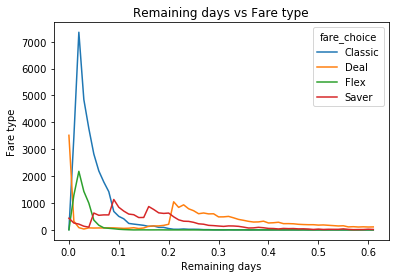

In [141]:
%matplotlib inline
pd.crosstab(df.days_in,df.fare_choice).plot(kind='line')
plt.title('Remaining days vs Fare type')
plt.xlabel('Remaining days')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## dep_time vs fare choice

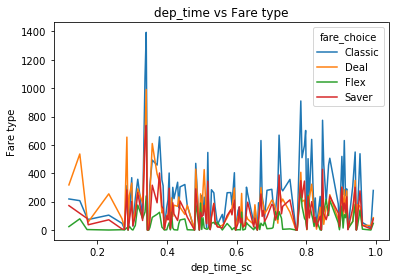

In [91]:
%matplotlib inline
pd.crosstab(df.dep_time_sc,df.fare_choice).plot(kind='line')
plt.title('dep_time vs Fare type')
plt.xlabel('dep_time_sc')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## journey vs fare choice

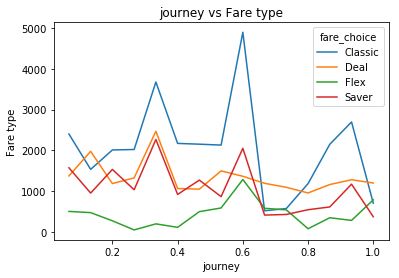

In [92]:
%matplotlib inline
pd.crosstab(df.journey,df.fare_choice).plot(kind='line')
plt.title('journey vs Fare type')
plt.xlabel('journey')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## booking_weekday vs fare choice

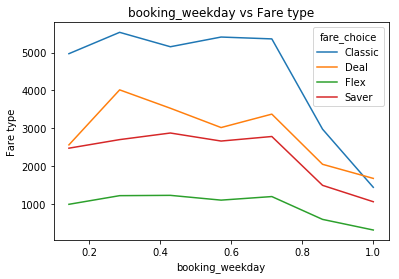

In [93]:
%matplotlib inline
pd.crosstab(df.booking_weekday,df.fare_choice).plot(kind='line')
plt.title('booking_weekday vs Fare type')
plt.xlabel('booking_weekday')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## dep_weekday vs fare choice

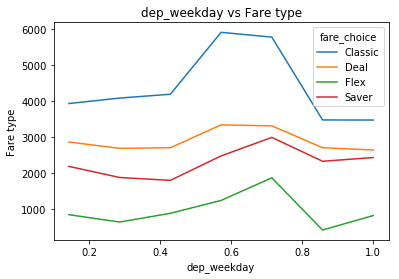

In [94]:
%matplotlib inline
pd.crosstab(df.dep_weekday,df.fare_choice).plot(kind='line')
plt.title('dep_weekday vs Fare type')
plt.xlabel('dep_weekday')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## passengers vs fare choice

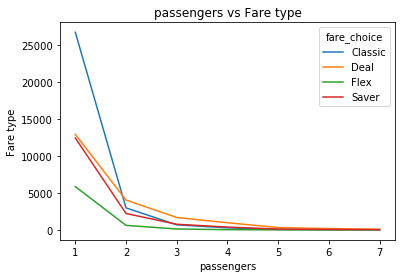

In [95]:
%matplotlib inline
pd.crosstab(df.pax,df.fare_choice).plot(kind='line')
plt.title('passengers vs Fare type')
plt.xlabel('passengers')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## dep_date vs fare choice

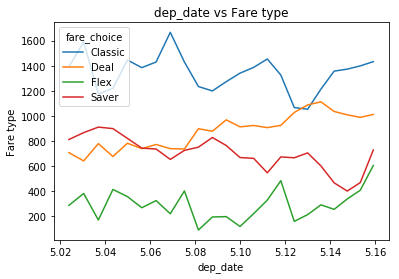

In [104]:
%matplotlib inline
pd.crosstab(df.dep_date_log,df.fare_choice).plot(kind='line')
plt.title('dep_date vs Fare type')
plt.xlabel('dep_date')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## booking_date vs fare choice

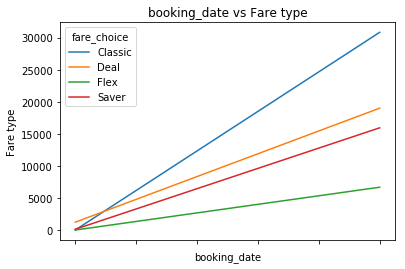

In [107]:
%matplotlib inline
pd.crosstab(df.booking_date_in,df.fare_choice).plot(kind='line')
plt.title('booking_date vs Fare type')
plt.xlabel('booking_date')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## Training data feature selection

In [142]:
#select columns here for features
flightDataPd = df[['origin','destination','journey','pax', 'days_in','dep_time_sc','booking_weekday','dep_weekday','booking_date','dep_date','fare_choice_sc']]
flightData = flightDataPd.as_matrix(columns=flightDataPd.columns[0:])
print(flightData)
#change the length of the features based on the selection
featureLength = 10
X = flightData[:,0:featureLength]
#print(X)
y = flightData[:,featureLength]
#print(y)
print(max(df['origin']))
print(max(df['destination']))
print(max(df['journey']))
print(max(df['pax']))
print(max(df['days_log']))
print(max(df['dep_time_sc']))
print(max(df['booking_weekday']))
print(max(df['dep_weekday']))
print(max(df['booking_date_log']))
print(max(df['dep_date_log']))
print(max(df['fare_choice_sc']))

flightDataPd.head()

[[ 1.          0.8         1.         ...,  0.41        1.52        2.        ]
 [ 0.57142857  0.4         0.6        ...,  1.47        1.52        1.        ]
 [ 0.28571429  0.8         0.33333333 ...,  1.5         1.52        4.        ]
 ..., 
 [ 0.57142857  0.4         0.6        ...,  1.36        1.74        2.        ]
 [ 0.42857143  0.4         0.46666667 ...,  1.5         1.74        2.        ]
 [ 0.28571429  1.          0.4        ...,  1.71        1.74        1.        ]]
1.0
1.0
1.0
1.0
1.2864740258376797
0.9930555555555556
1.0
1.0
1.297463147413275
0.5538851132264376
4


,origin,destination,journey,pax,days_in,dep_time_sc,booking_weekday,dep_weekday,booking_date,dep_date,fare_choice_sc
0,1.000000,0.8,1.000000,0.285714,0.0001,0.315972,0.714286,0.571429,0.41,1.52,2
1,0.571429,0.4,0.600000,0.142857,0.0600,0.784722,0.857143,0.571429,1.47,1.52,1
2,0.285714,0.8,0.333333,0.142857,0.0300,0.420139,0.285714,0.571429,1.50,1.52,4
3,0.285714,0.2,0.200000,0.285714,0.0300,0.940972,0.285714,0.571429,1.50,1.52,1
4,0.571429,0.4,0.600000,0.142857,0.0300,0.572917,0.285714,0.571429,1.50,1.52,1


## Testing data feature selection

In [143]:
#select columns here for features
flightDataTestPd = test_df[['origin','destination','journey','pax', 'days_in','dep_time_sc','booking_weekday','dep_weekday','booking_date','dep_date']]
flightDataTest = flightDataTestPd.as_matrix(columns=flightDataTestPd.columns[0:])

#change the length of the features based on the selection
data_X_testF = flightDataTest[:,0:featureLength]
#data_y_testF = flightDataTest[:,featureLength-1]
#print(data_y_test)
flightDataTestPd.head()

,origin,destination,journey,pax,days_in,dep_time_sc,booking_weekday,dep_weekday,booking_date,dep_date
0,1.000000,0.8,0.133333,0.285714,0.0001,0.784722,0.714286,0.857143,1.11,1.75
1,0.571429,0.4,0.333333,0.285714,0.3200,0.753472,0.428571,0.857143,1.44,1.75
2,0.285714,0.8,0.133333,0.142857,0.0001,0.336806,0.428571,0.857143,1.02,1.75
3,0.285714,0.2,0.133333,0.285714,0.0400,0.520833,0.428571,0.857143,1.72,1.75
4,0.571429,0.4,0.266667,0.142857,0.2500,0.840278,0.428571,0.857143,1.51,1.75


In [144]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


## Training

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier



data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#LOGISTIC REGRESSION
#regr = linear_model.LogisticRegression()
# Train the model using the training sets
#regr.fit(data_X_train, data_y_train)

#Support Vector Classification
regr = svm.SVC(C = 1.0, probability=True, kernel='rbf')
regr.fit(data_X_train,data_y_train)

#RANDOM FOREST
#regr = RandomForestClassifier(max_depth=7, random_state=1)
#regr.fit(data_X_train,data_y_train)


## Prediction and writing the results in CSV

In [ ]:
# predict class labels for the test set
predicted = regr.predict(data_X_test)
predicted_prob = regr.predict_proba(data_X_testF)
print(data_y_test)
print((predicted))


#print(regr.score(data_y_test,predicted))

idx = 0
df_y_pred = pd.DataFrame(predicted_prob)
df_y_pred.insert(loc=idx, column='id', value=np.nan)
df_y_pred['id'] = df_y_pred.index + 73831
print(df_y_pred.head(20))
prediction_location = r'prediction.csv'
df_y_pred.to_csv(prediction_location, index=False, header=['id', 'Classic', 'Deal', 'Flex', 'Saver'])

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regr.score(data_X_test, data_y_test)))

# The mean squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_y_test, predicted))



## Cross validation

In [147]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(regr, X, y, cv=kfold, scoring=scoring)
predictions = model_selection.cross_val_predict(regr, X, y, cv=kfold)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

# The mean squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, predictions))

10-fold cross validation average accuracy: 0.762
Mean absolute error: 0.53
Variance score: 0.08
